In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category="ConvergenceWarning")


In [2]:
df1 = pd.read_csv('catatan_lokasi.csv')
df2 = pd.read_csv('data_profil.csv')

In [3]:
df1

,id,tanggal,lokasi_dominan
0,1,21/05/19,Jakarta Pusat
1,2,21/05/19,Kabupaten Bogor
2,3,21/05/19,Jakarta Pusat
3,4,21/05/19,Kota Tangerang
4,5,21/05/19,Kota Bogor
...,...,...,...
2595,96,15/06/19,Kota Bogor
2596,97,15/06/19,Kota Tangerang Selatan
2597,98,15/06/19,Jakarta Timur
2598,99,15/06/19,Jakarta Timur


In [4]:
df2

,id,jenis_kelamin,divisi,umur
0,1,Laki-laki,Customer Service,34
1,2,Laki-laki,Data Engineer,26
2,3,Laki-laki,Software Engineer,28
3,4,Perempuan,Business Intelligence,21
4,5,Perempuan,Software Engineer,21
...,...,...,...,...
95,96,Perempuan,Customer Service,23
96,97,Laki-laki,Software Engineer,32
97,98,Perempuan,Business Intelligence,28
98,99,Perempuan,Software Engineer,25


In [5]:
df_profil = pd.merge(df1 , df2 , on = 'id')
df_profil

,id,tanggal,lokasi_dominan,jenis_kelamin,divisi,umur
0,1,21/05/19,Jakarta Pusat,Laki-laki,Customer Service,34
1,1,22/05/19,Jakarta Pusat,Laki-laki,Customer Service,34
2,1,23/05/19,Jakarta Pusat,Laki-laki,Customer Service,34
3,1,24/05/19,Kota Bekasi,Laki-laki,Customer Service,34
4,1,25/05/19,Kota Bekasi,Laki-laki,Customer Service,34
...,...,...,...,...,...,...
2595,100,11/06/19,Jakarta Timur,Perempuan,Software Engineer,29
2596,100,12/06/19,Jakarta Timur,Perempuan,Software Engineer,29
2597,100,13/06/19,Jakarta Timur,Perempuan,Software Engineer,29
2598,100,14/06/19,Jakarta Timur,Perempuan,Software Engineer,29


In [6]:
df_profil.describe()

,id,umur
count,2600.000000,2600.00000
mean,50.500000,27.66000
std,28.871623,4.32569
min,1.000000,21.00000
25%,25.750000,24.00000
50%,50.500000,27.00000
75%,75.250000,32.00000
max,100.000000,35.00000


In [7]:
df_profil.nunique()

id                100
tanggal            26
lokasi_dominan     28
jenis_kelamin       2
divisi              6
umur               15
dtype: int64

In [8]:
df_profil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2600 non-null   int64 
 1   tanggal         2600 non-null   object
 2   lokasi_dominan  2600 non-null   object
 3   jenis_kelamin   2600 non-null   object
 4   divisi          2600 non-null   object
 5   umur            2600 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 122.0+ KB


In [9]:
df_profil[['divisi']].value_counts()

divisi               
Software Engineer        806
Business Intelligence    546
Customer Service         390
Data Engineer            364
Data Science             260
Marketing                234
Name: count, dtype: int64

In [10]:
df_profil[['lokasi_dominan']].value_counts()

lokasi_dominan           
Kota Depok                   177
Kota Bekasi                  165
Jakarta Timur                163
Jakarta Barat                155
Kota Bogor                   155
Jakarta Pusat                145
Kota Tangerang               127
Kabupaten Bekasi             122
Kabupaten Sleman             120
Kota Yogyakarta              117
Kota Tangerang Selatan       116
Jakarta Selatan              105
Jakarta Utara                100
Kabupaten Bogor               98
Kota Medan                    85
Kota Padang                   81
Kabupaten Tangerang           79
Kabupaten Wonogiri            71
Kabupaten Bantul              68
Kabupaten Lampung Selatan     61
Kota Bandar Lampung           58
Kota Bandung                  54
Kota Surabaya                 52
Kota Semarang                 41
Kabupaten Tasikmalaya         35
Kota Manado                   33
Kota Banda Aceh               10
Kabupaten Kebumen              7
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping = {'Laki-laki': 0, 'Perempuan': 1}
df_profil['jenis_kelamin'] = le.fit_transform(df_profil['jenis_kelamin'].map(mapping))
df_profil

,id,tanggal,lokasi_dominan,jenis_kelamin,divisi,umur
0,1,21/05/19,Jakarta Pusat,0,Customer Service,34
1,1,22/05/19,Jakarta Pusat,0,Customer Service,34
2,1,23/05/19,Jakarta Pusat,0,Customer Service,34
3,1,24/05/19,Kota Bekasi,0,Customer Service,34
4,1,25/05/19,Kota Bekasi,0,Customer Service,34
...,...,...,...,...,...,...
2595,100,11/06/19,Jakarta Timur,1,Software Engineer,29
2596,100,12/06/19,Jakarta Timur,1,Software Engineer,29
2597,100,13/06/19,Jakarta Timur,1,Software Engineer,29
2598,100,14/06/19,Jakarta Timur,1,Software Engineer,29


<Axes: xlabel='umur', ylabel='divisi'>

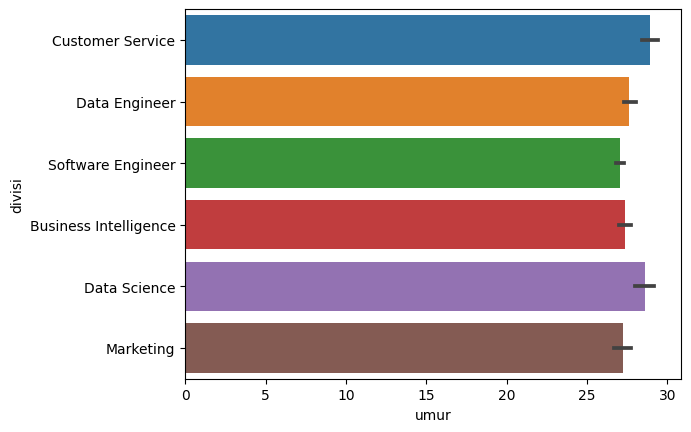

In [12]:
import seaborn as sns
sns.barplot(x=df_profil['umur'],y=df_profil['divisi'],)

In [16]:
import folium 
m=folium.Map(location=[-6.2846104,106.8053104], zoom_start=17, tiles='stamen terrain')
m